In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sg2lib import *

## 1. Create deformation gradient
Define isochoric deformation gradient `F` which is characterized by simple shear $\gamma=2$ along line inclined 35° anticlockwise from x-axis. It should represents deformation along ADD shear zone on the image. NOTE THE SENSE OF SHEAR!!!

<img src="https://geosociety.files.wordpress.com/2013/08/jessup_gsa_fig_7.jpg" alt="ADD shear zone" style="width: 480px;"/>

In [2]:
theta = np.radians(35)

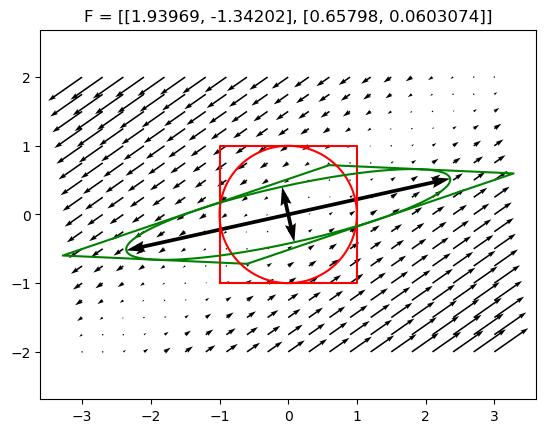

In [5]:
SS = np.array([[1, -2], [0, 1]])
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
F = R @ SS @ R.T
def_show(F)

### Check if it is correct
This code will check, whether your matrix `F` is correct. Should show normal shearing along inclined line.

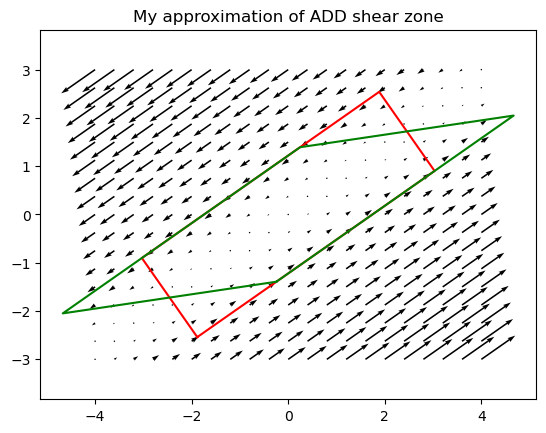

In [6]:
xc, yc = [-3, -3, 3, 3, -3], [-1, 1, 1, -1, -1]
xc, yc = np.dot(R, [xc,yc])
x, y = np.dot(F, [xc,yc])
X, Y = np.meshgrid(np.linspace(-4, 4, 21), np.linspace(-3, 3, 17))
u, v = np.tensordot(F - np.eye(2), [X, Y], axes=1)
plt.quiver(X, Y, u, v, angles='xy')
plt.plot(xc, yc, 'r', x, y, 'g')
plt.title('My approximation of ADD shear zone')
plt.axis('equal');

## 2. Create plot showing relation between initial orientation of the line and it stretching

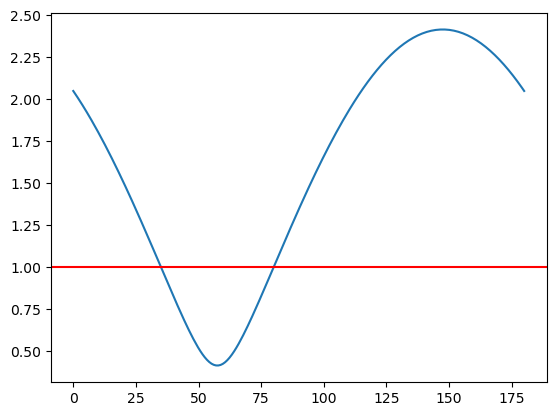

In [23]:
stretch = []
angs = np.linspace(0, np.pi, 200)
for ang in angs:
    x = np.array([[np.cos(ang)], [np.sin(ang)]])
    stretch.append(np.linalg.norm(F @ x))
plt.plot(np.degrees(angs), stretch)
plt.axhline(1, color ='r');

### Answer following questions

 1. What is the original orientation of line, which shows maximum stretching in the shear zone?
 2. What is the range of original orientations of those line, which are shortenned during deformation?
 3. If there was horizontally oriented sheets of leucogranites in rocks affected by shear zone (like the ones below Mt. Everest), what is their stretching after deformation?

1) 150 degrees
2) 0-55 & 150-245
3) S = 2

In [26]:
stretch = np.array(stretch)
max = np.degrees(angs[stretch == stretch.max()][0])
max

147.43718592964825

In [31]:
short = np.degrees(angs[stretch<1])
short.min
short.max

<function ndarray.max>

In [29]:
h_s = stretch[angs==0][0]
h_s

2.0482541236185705